In [1]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
        ["ytbeaver",
     "beaver.","no change",40.804483,-77.864219],
            ["ytcollege",
     "college","no change",40.804483,-77.864219],
    ]

camera_subset = [

    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camera_subsetx = [
    

  
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
    
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817]
]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

ID                                        Description  \
0    CAM02009CCTV7.jpg  I-80 Eastbound Exit 161 Bellefonte Interchange...   
1    CAM02001CCTV2.jpg              Port Matilda US-322 By-Pass Westbound   
2   CAM02010CCTV11.jpg                   Port Matilda I-99 Exit 61 Median   
3    CAM02005CCTV9.jpg  Milesburg Interchange West I-80 Exit 158 Eastb...   
4   CAM02006CCTV10.jpg  Milesburg Interchange East I-80 Exit 158 Westb...   
5   CAM02028CCTV32.jpg                          Atherton and Valley Vista   
6   CAM02037CCTV43.jpg                                 Atherton and Vairo   
7   CAM02038CCTV44.jpg                           Atherton and North Hills   
8   CAM02039CCTV45.jpg                                  Atherton and Park   
9   CAM02040CCTV46.jpg                             Atherton and W.College   
10  CAM02042CCTV49.jpg                              Atherton and W.Beaver   
11   CAM02003CCTV4.jpg                            I-99/US-322 Interchange   
12  CAM02020CCTV24.jpg                                        Benner Pike   
13   CAM02002CCTV3.jpg                                        Grays Woods   
14  CAM02007CCTV13.jpg                                   US-322 E/O PA-26   
15  CAM02046CCTV52.jpg                         I-99 at Exit 71 (Toftrees)   
16  CAM02033CCTV38.jpg                             Snowshoe I-80 Exit 147   
17      collegeTwp.jpg                    College Township Traffic camera   
18   parkArboretum.jpg                                      PSU Park Ave.   
19            ytbeaver                                            beaver.   
20           ytcollege                                            college   

                            status  
0                        no change  
1                     changed 4/27  
2                        no change  
3                        no change  
4                     changed 4/27  
5                        no change  
6                        no change  
7                        no change  
8                        no change  
9                      changed 5/2  
10  changed 5/2-5/4, then returned  
11                     changed 5/1  
12  changed 5/6-5/7, then returned  
13                     changed 5/3  
14                     changed 5/4  
15                     changed 5/5  
16                       no change  
17                       no change  
18                       no change  
19                       no change  
20                       no change

In [2]:
date = "091922"

In [3]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv(f"allcams{date}.csv")
print("read data")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
print("will now sort...")
xdf.sort_values(by='datetime_EST')



read data
will now sort...


datetime_UTC  \
0         2020-04-27 00:00:02   
1         2020-04-27 00:00:05   
2         2020-04-27 00:00:08   
3         2020-04-27 00:00:10   
4         2020-04-27 00:00:12   
...                       ...   
35076765  2022-09-19 13:47:40   
35076766  2022-09-19 13:47:42   
35076767  2022-09-19 13:47:44   
35076768  2022-09-19 13:47:46   
35076769  2022-09-19 13:47:50   

                                                 image_file  vehicle_count  \
0         /home/ubuntu/cams1/20200427_000002_CAM02033CCT...              0   
1         /home/ubuntu/cams1/20200427_000005_collegeTwp.jpg              2   
2         /home/ubuntu/cams1/20200427_000008_CAM02028CCT...              1   
3         /home/ubuntu/cams1/20200427_000010_CAM02037CCT...              3   
4         /home/ubuntu/cams1/20200427_000012_CAM02038CCT...              0   
...                                                     ...            ...   
35076765  /home/ubuntu/camsg10/CAM02007CCTV13/20220919/2...              0   
35076766  /home/ubuntu/camsg10/CAM02046CCTV52/20220919/2...              0   
35076767  /home/ubuntu/camsg10/CAM02009CCTV7/20220919/20...              2   
35076768  /home/ubuntu/camsg10/CAM02001CCTV2/20220919/20...              0   
35076769  /home/ubuntu/camsg10/CAM02005CCTV9/20220919/20...              0   

                datetime_EST     camera_name  
0        2020-04-26 20:00:02  CAM02033CCTV38  
1        2020-04-26 20:00:05      collegeTwp  
2        2020-04-26 20:00:08  CAM02028CCTV32  
3        2020-04-26 20:00:10  CAM02037CCTV43  
4        2020-04-26 20:00:12  CAM02038CCTV44  
...                      ...             ...  
35076765 2022-09-19 09:47:40  CAM02007CCTV13  
35076766 2022-09-19 09:47:42  CAM02046CCTV52  
35076767 2022-09-19 09:47:44   CAM02009CCTV7  
35076768 2022-09-19 09:47:46   CAM02001CCTV2  
35076769 2022-09-19 09:47:50   CAM02005CCTV9  

[35076770 rows x 5 columns]

In [4]:
print(len(xdf))

34453236


In [4]:
print(len(xdf))

35076770


In [5]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [6]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [7]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [8]:
icdfcvc.to_csv(f"vehicle_avg_per_hour_each_camera_427-{date}.csv",index=False)

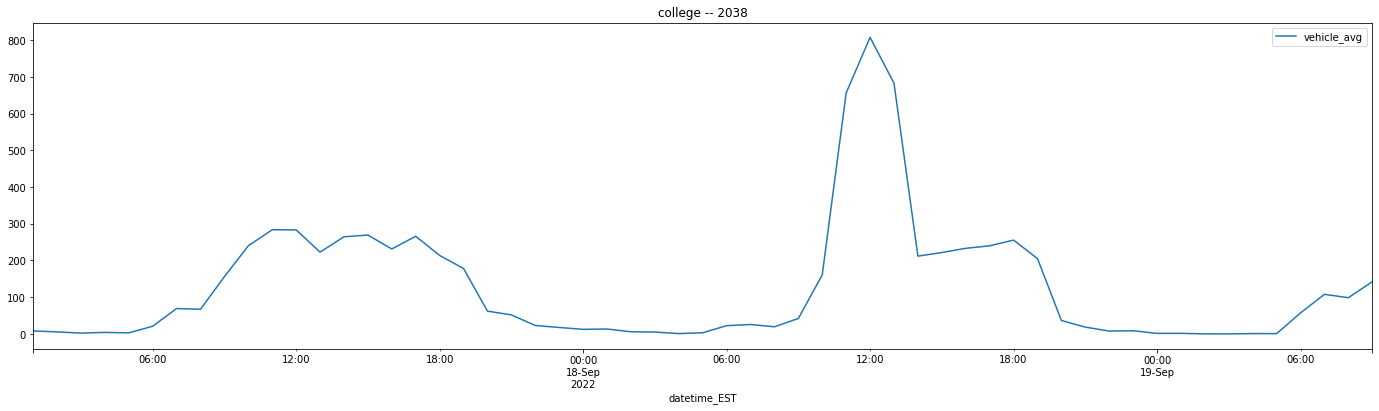

In [10]:

    cn = "2038"
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    sds = fdf_twp[(fdf_twp['datetime_EST'] > '2022-09-17 00:00:00')]
    ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


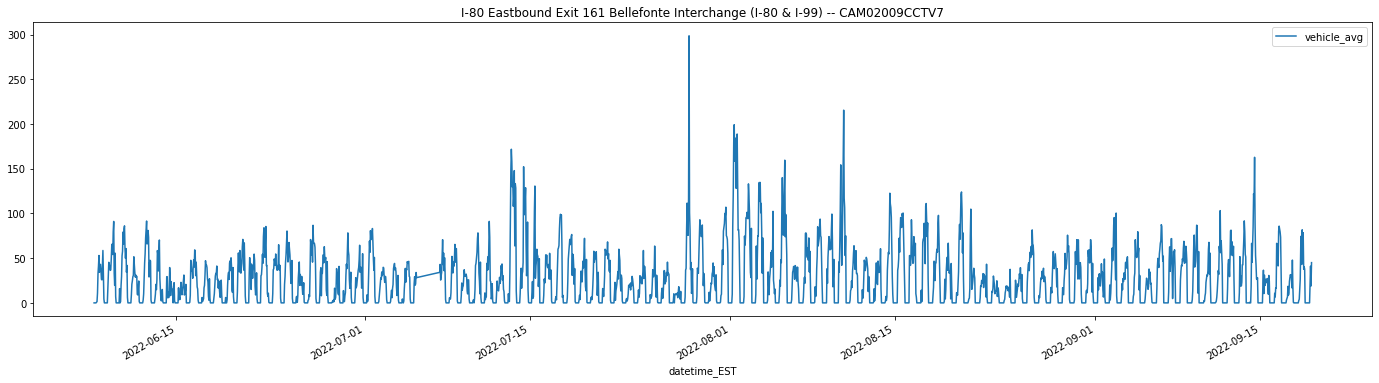

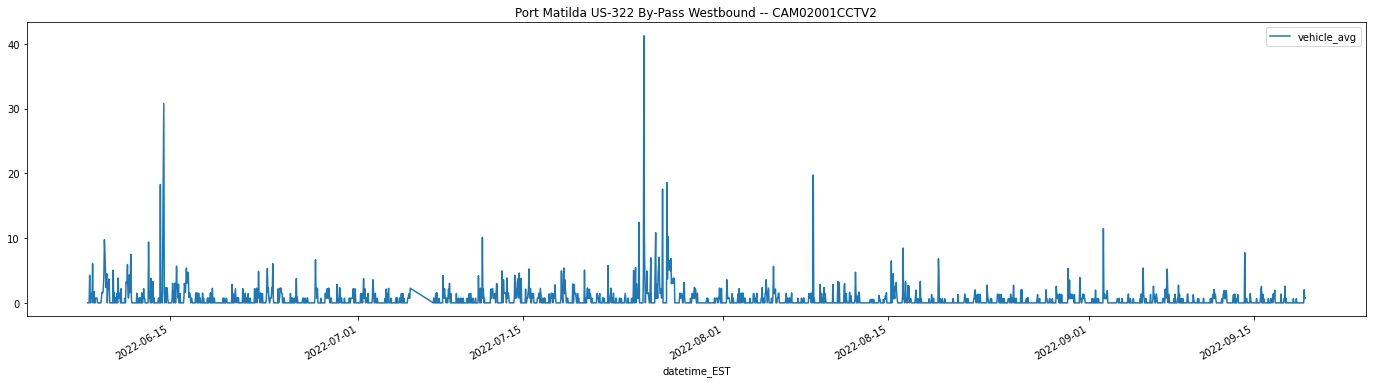

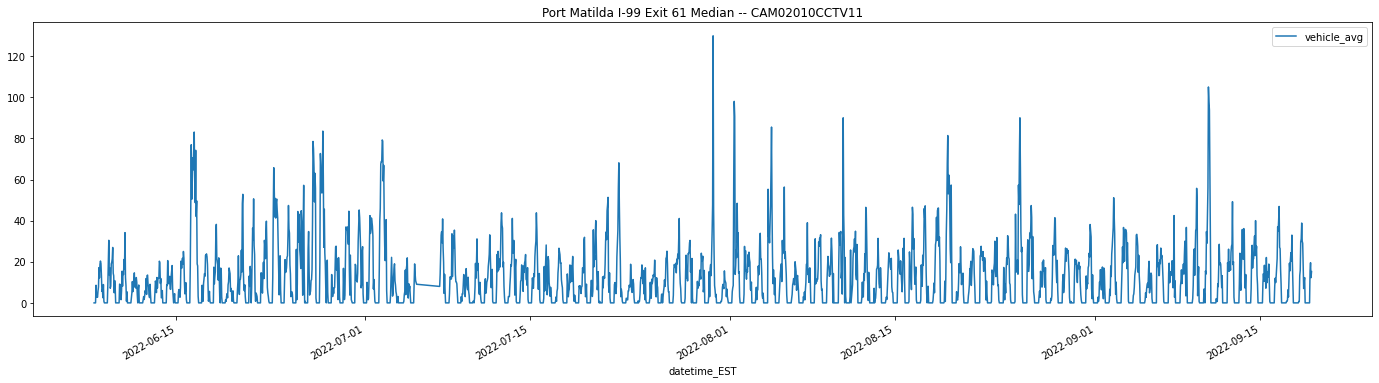

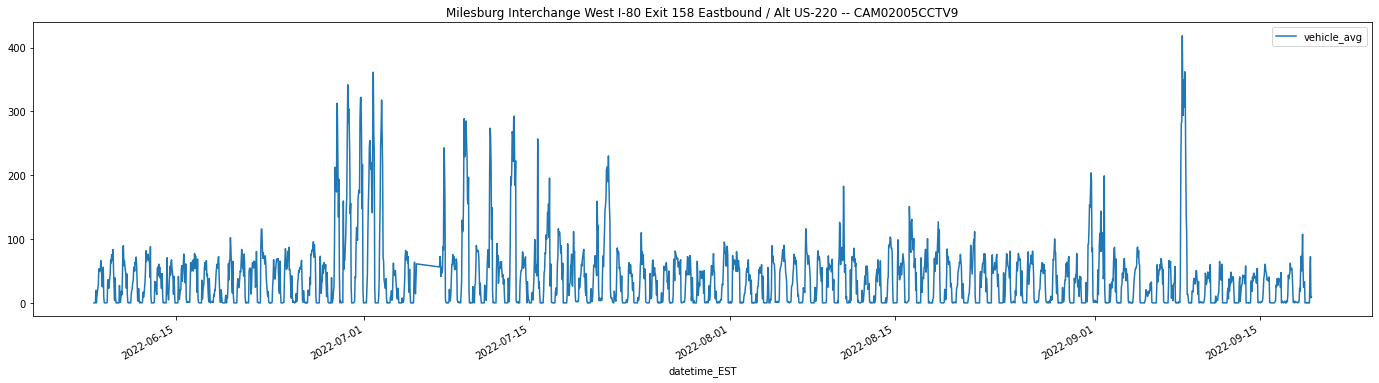

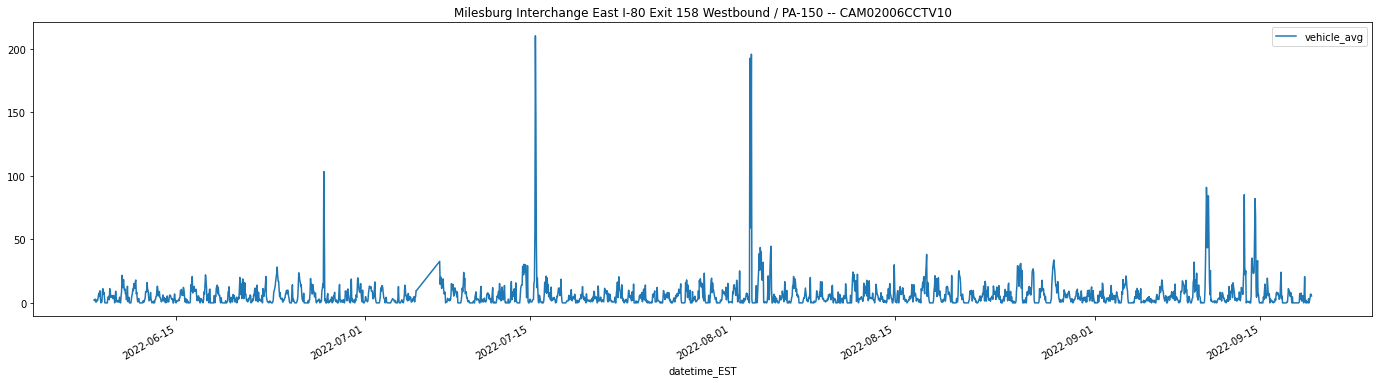

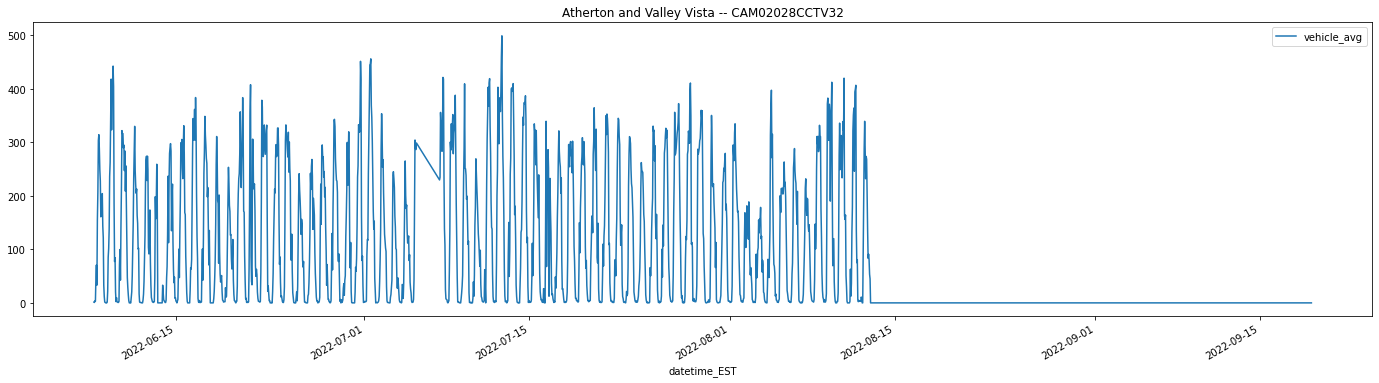

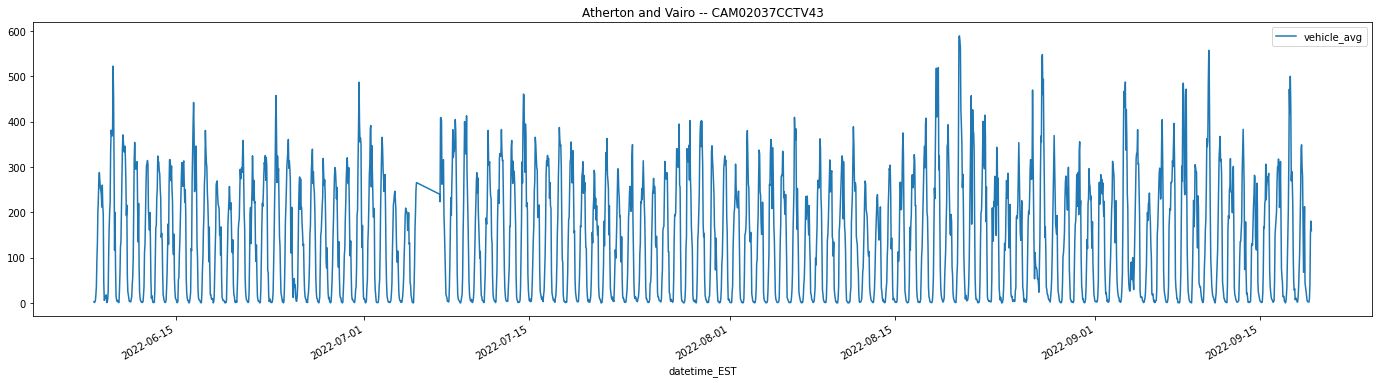

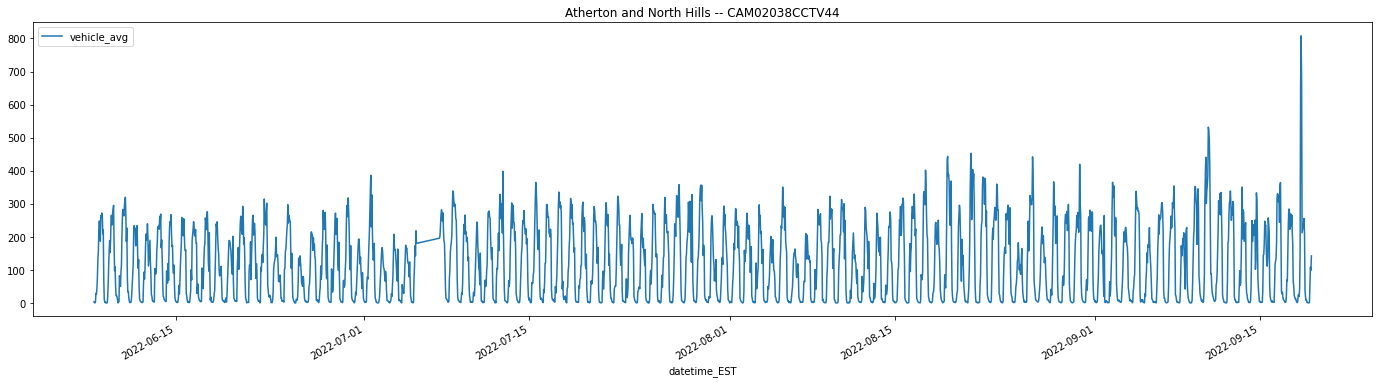

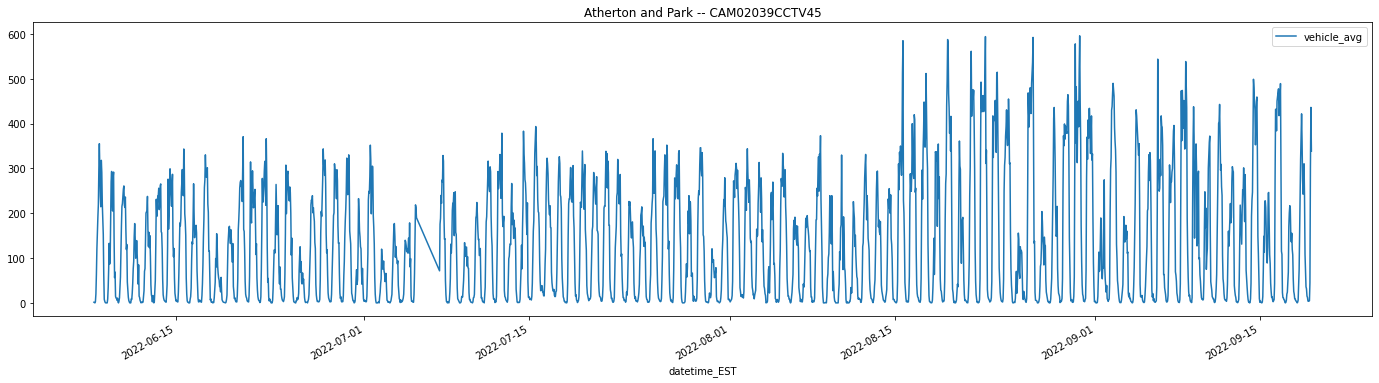

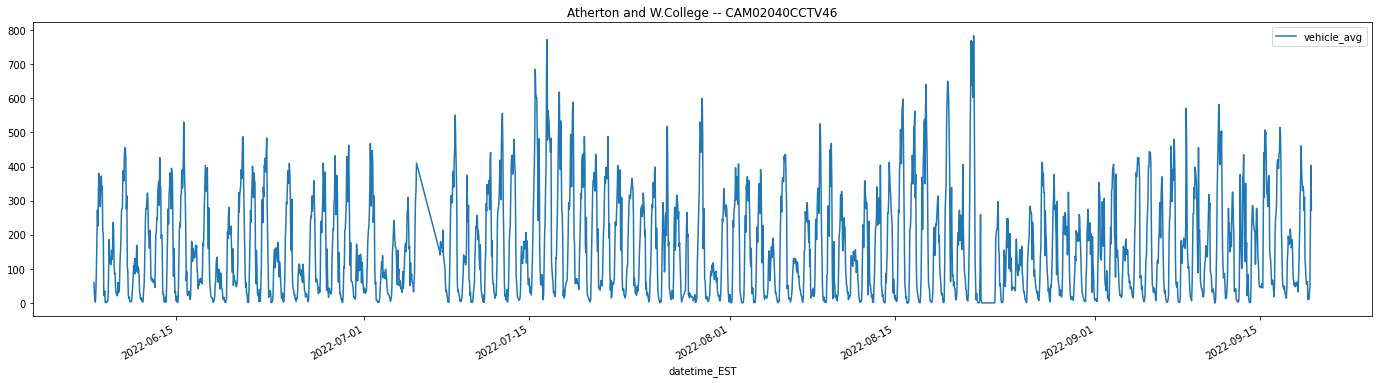

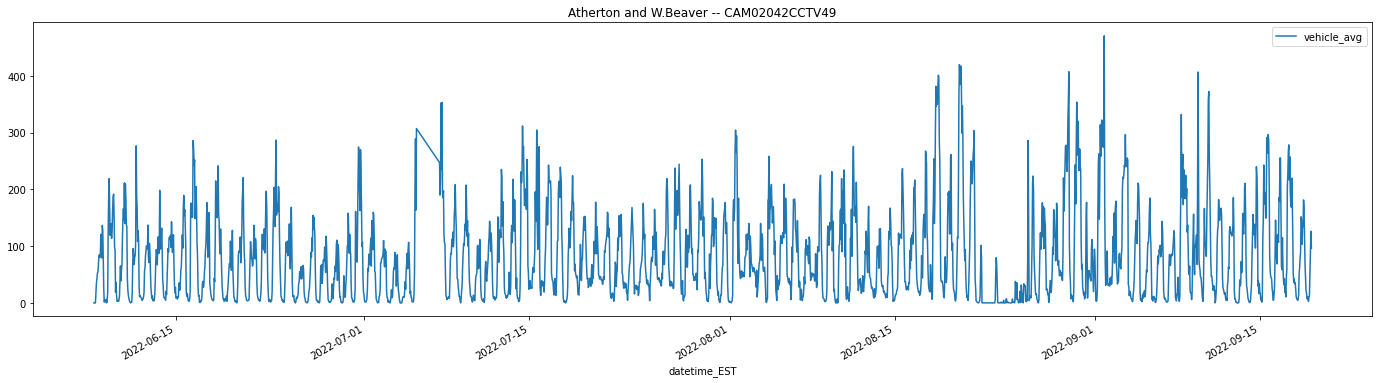

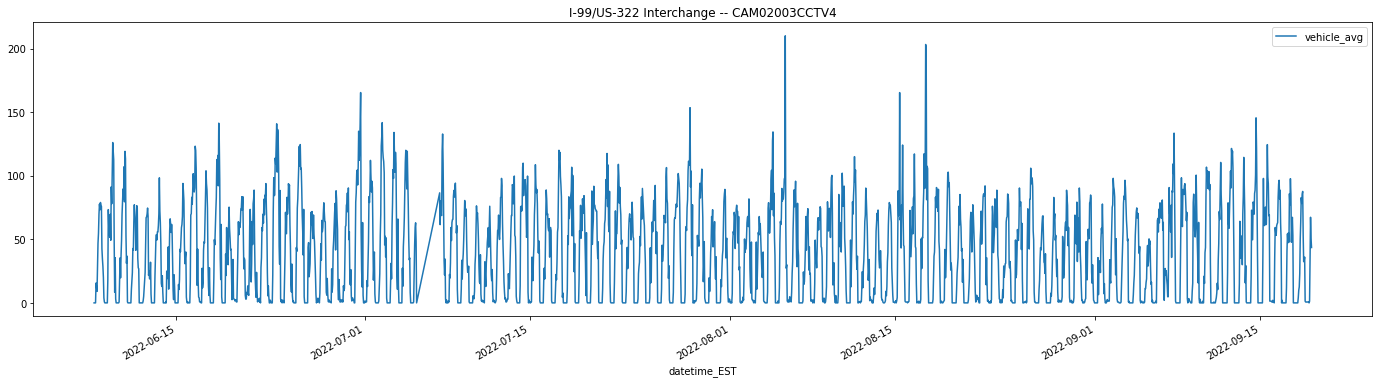

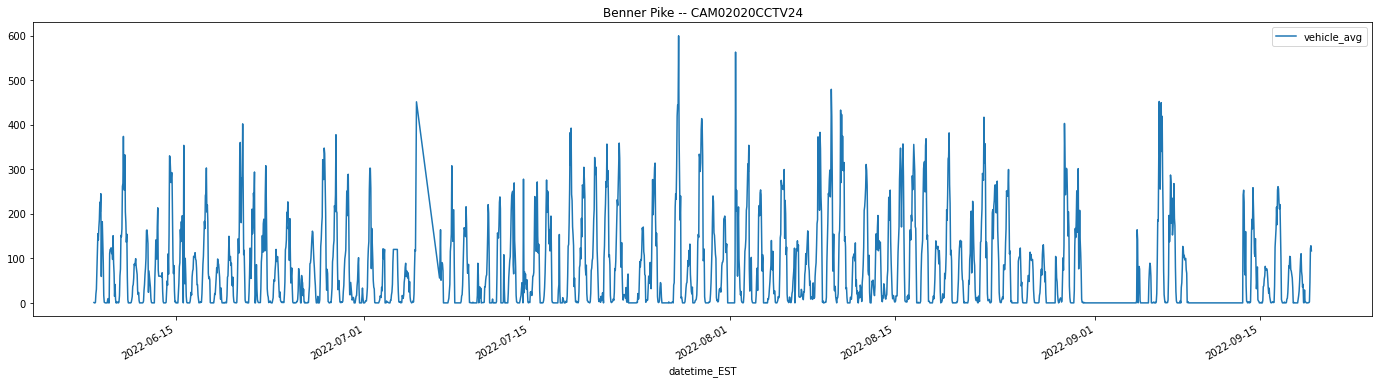

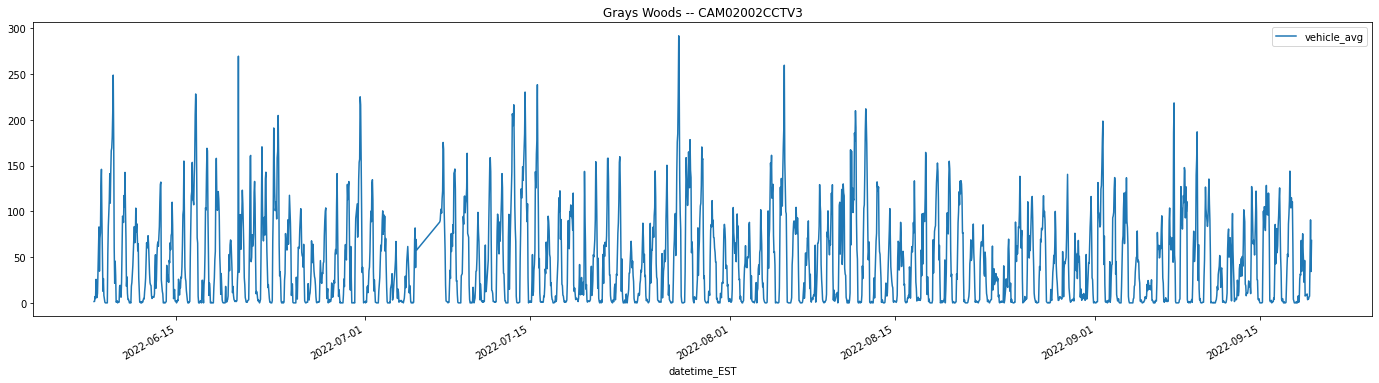

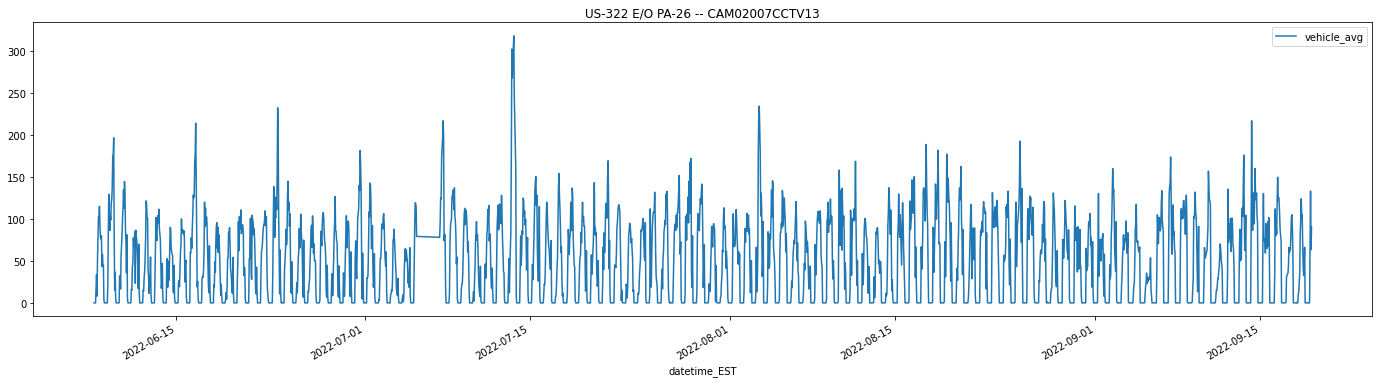

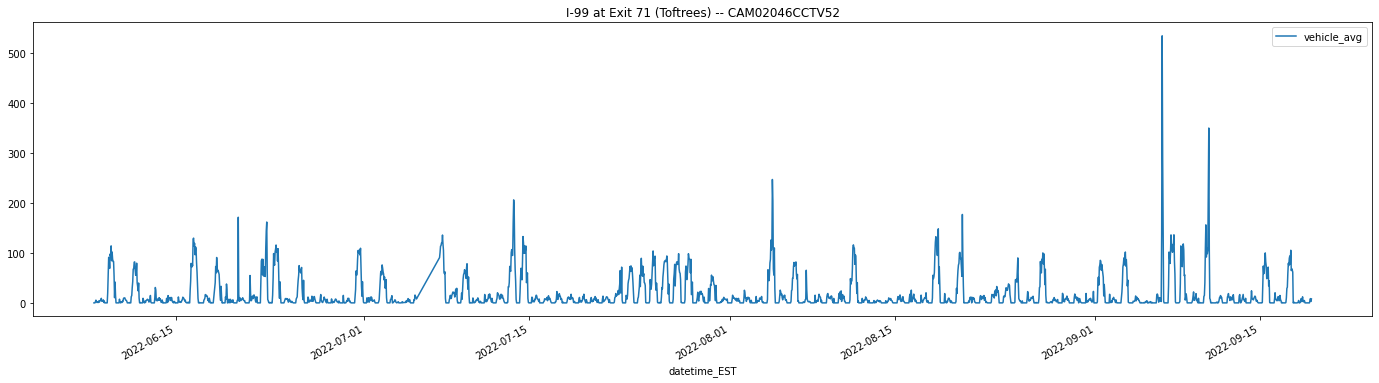

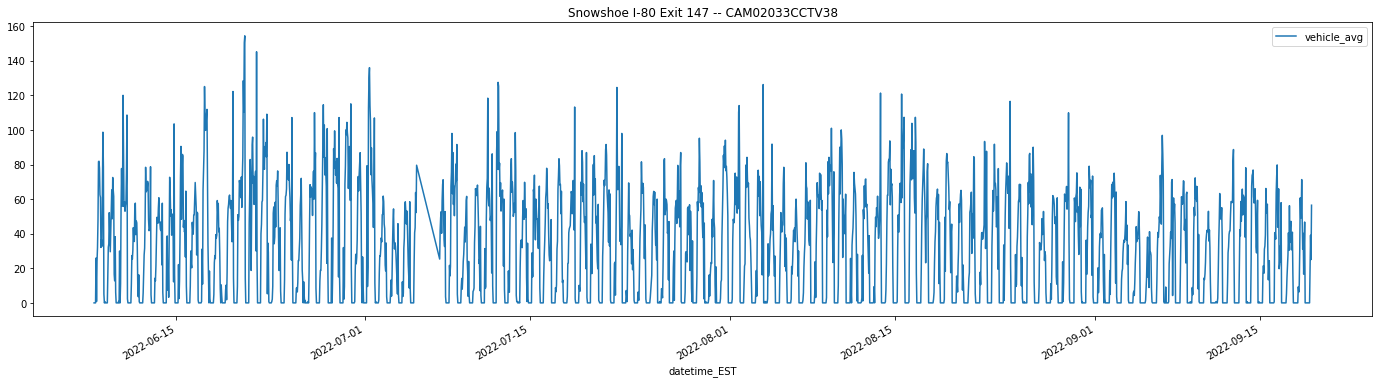

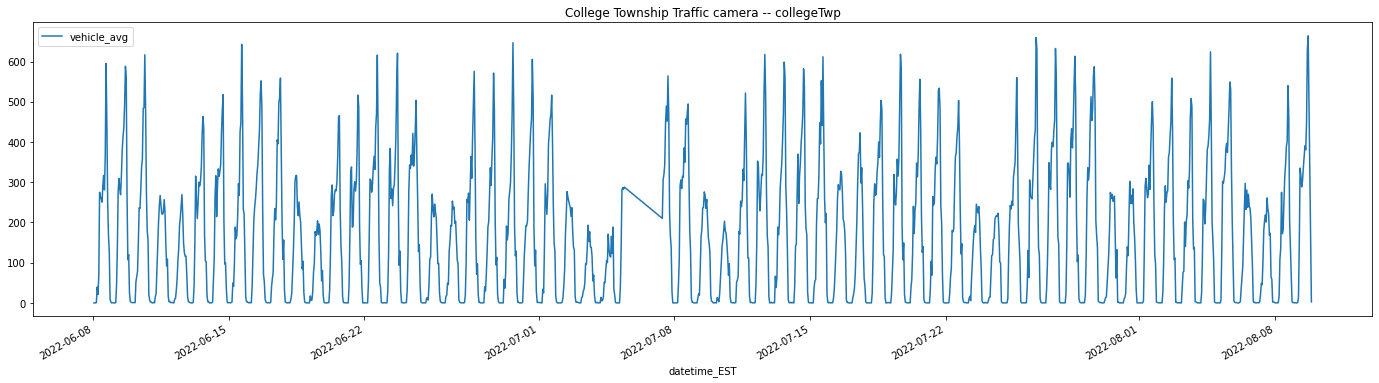

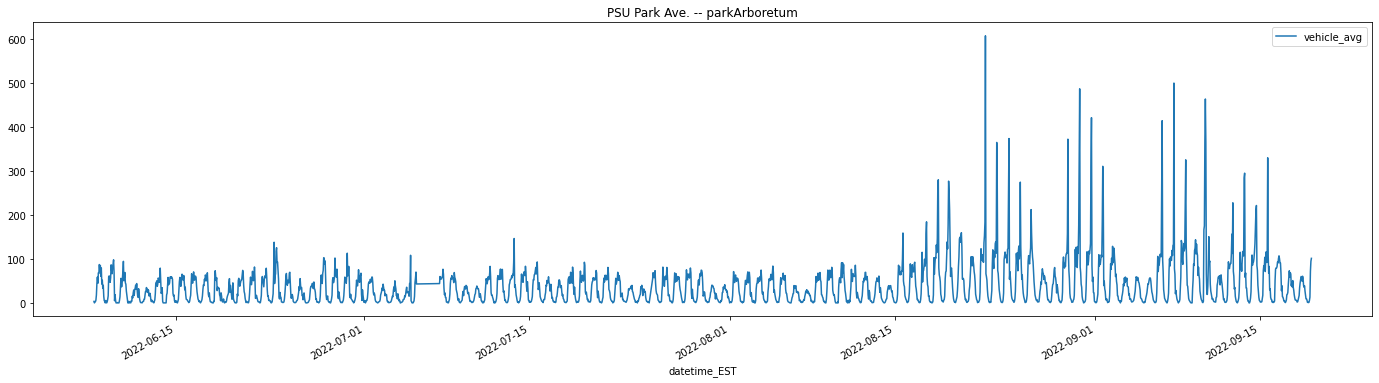

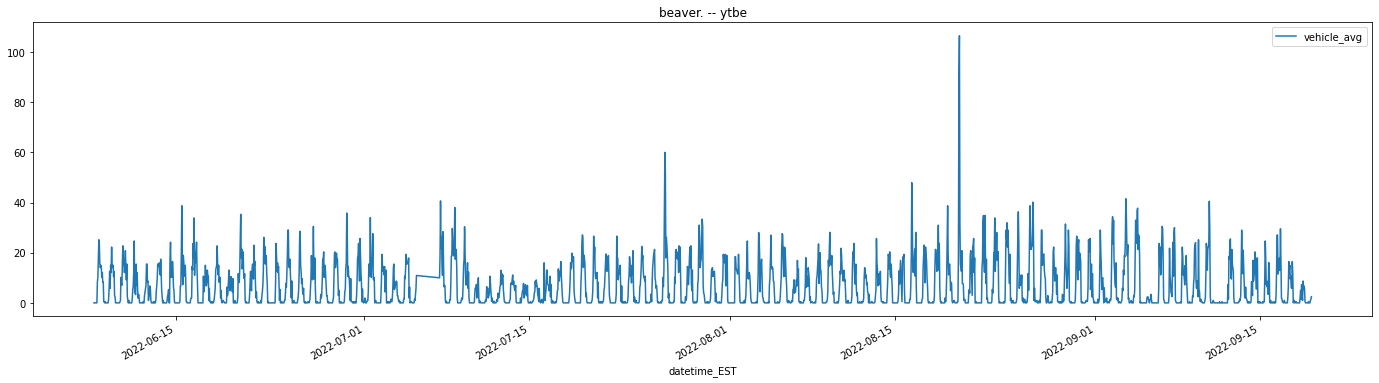

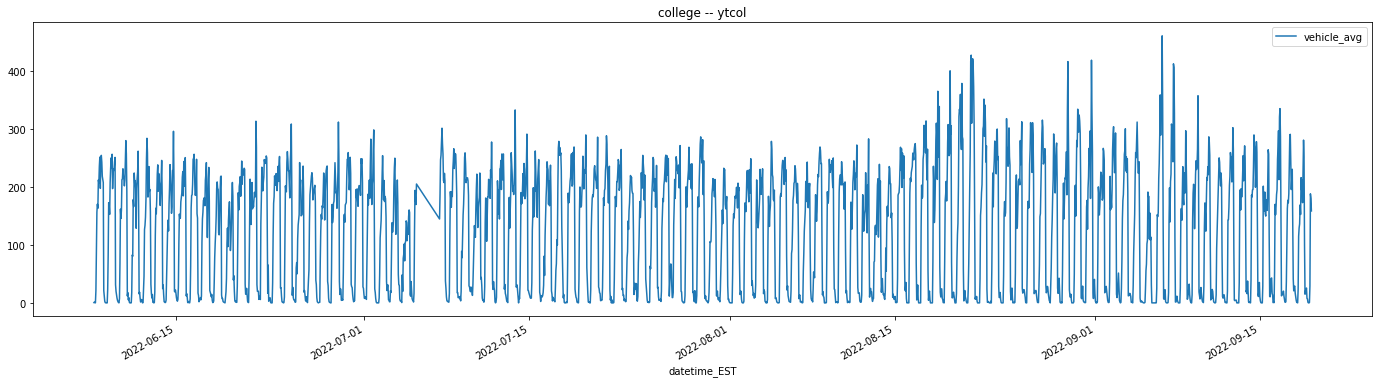

In [9]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    sds = fdf_twp[(fdf_twp['datetime_EST'] > '2022-06-08 00:00:00')]
    ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [11]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)
print("X")
# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

print("X")
del xdfn

#xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn1.drop(xdfn1[(xdfn1["camera_name"] == "CAM02009CCTV7") & (xdfn1['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn1['datetime_EST'] < '2020-8-19 16:03:00') ].index)

print("X")
del xdfn1

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

del xdfn3

print("X")


xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)

del xdfn4
print("X")

xdfn6 = xdfn5.drop(xdfn5[(xdfn5["camera_name"] == "CAM02005CCTV9") & (xdfn5['datetime_EST'] > '2020-11-25 15:00:00') & (xdfn5['datetime_EST'] < '2020-11-27 00:00:00')].index)
del xdfn5
print("X")
xdfn7 = xdfn6.drop(xdfn6[(xdfn6["camera_name"] == "CAM02020CCTV24") & (xdfn6['datetime_EST'] > '2020-12-07 11:00:00') &  (xdfn6['datetime_EST'] < '2020-12-08 17:00:00')].index)
del xdfn6
print("X")

xdfn7b = xdfn7.drop(xdfn7[(xdfn7["camera_name"] == "CAM02006CCTV10") & (xdfn7['datetime_EST'] > '2021-02-26 16:00:00') &  (xdfn7['datetime_EST'] < '2021-02-27 07:00:00')].index)
del xdfn7
print("X")
xdfn7c = xdfn7b.drop(xdfn7b[(xdfn7b["camera_name"] == "CAM02020CCTV24") & (xdfn7b['datetime_EST'] > '2021-03-25 09:00:00') &  (xdfn7b['datetime_EST'] < '2021-03-27 06:00:00')].index)
del xdfn7b
print("X")

xdfn7d = xdfn7c.drop(xdfn7c[(xdfn7c["camera_name"] == "CAM02020CCTV24") & (xdfn7c['datetime_EST'] > '2021-11-20 15:00:00') &  (xdfn7c['datetime_EST'] < '2021-11-21 17:00:00')].index)
del xdfn7c
xdfn7e = xdfn7d.drop(xdfn7d[(xdfn7d["camera_name"] == "CAM02020CCTV24") & (xdfn7d['datetime_EST'] > '2021-12-07 15:00:00') &  (xdfn7d['datetime_EST'] < '2021-12-11 7:00:00')].index)
del xdfn7d
print("X")
xdfn7g = xdfn7e.drop(xdfn7e[(xdfn7e["camera_name"] == "CAM02020CCTV24") & (xdfn7e['datetime_EST'] > '2021-12-19 8:00:00') &  (xdfn7e['datetime_EST'] < '2021-12-21 18:00:00')].index)
del xdfn7e
print("X")
xdfn7h = xdfn7g.drop(xdfn7g[(xdfn7g["camera_name"] == "CAM02020CCTV24") & (xdfn7g['datetime_EST'] > '2022-01-06 16:00:00') &  (xdfn7g['datetime_EST'] < '2022-01-08 6:00:00')].index)
print("X")

X
X
X
X
X
X
X
X
X
X
X
X


In [12]:
print(len(xdf))

35076770


In [13]:
xdfn7h.to_csv(f"all_camera_vehicle_counts_042720-{date}.csv",index=False)

In [14]:
icdf = xdfn7h.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7h.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn7h.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7h.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [15]:
icdfcn = icdf.groupby(['datetime_EST'])['camera_name']

In [16]:
icdf

datetime_EST     camera_name  image_count
0      2020-04-26 20:00:00   CAM02001CCTV2           13
1      2020-04-26 20:00:00   CAM02002CCTV3           44
2      2020-04-26 20:00:00   CAM02003CCTV4           31
3      2020-04-26 20:00:00  CAM02006CCTV10           19
4      2020-04-26 20:00:00  CAM02007CCTV13           34
...                    ...             ...          ...
396784 2022-09-19 09:00:00  CAM02042CCTV49           68
396785 2022-09-19 09:00:00  CAM02046CCTV52           70
396786 2022-09-19 09:00:00   parkArboretum           77
396787 2022-09-19 09:00:00        ytbeaver           98
396788 2022-09-19 09:00:00       ytcollege           97

[396789 rows x 3 columns]

In [17]:
icdfs

datetime_EST  image_sum
0     2020-04-26 20:00:00        960
1     2020-04-26 21:00:00         68
2     2020-04-26 22:00:00        516
3     2020-04-26 23:00:00        794
4     2020-04-27 00:00:00        796
...                   ...        ...
20942 2022-09-19 05:00:00       1818
20943 2022-09-19 06:00:00       1781
20944 2022-09-19 07:00:00       1757
20945 2022-09-19 08:00:00       1743
20946 2022-09-19 09:00:00       1407

[20947 rows x 2 columns]

In [18]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn7h.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn7h.set_index('datetime_EST').resample('H').sum().reset_index()

In [19]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [20]:
df_sampledh = merged

In [21]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = ( float(row.vehicle_count) / ( float(row.image_sum) / (22.0 * 60.0) ) )
    return rv   



In [22]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [23]:
df_sampledh.to_csv(f"vehicle_avg_per_hour_all_cameras_427-{date}.csv",index=False)

In [24]:
#df_sampledh = pd.read_csv(f"vehicle_avg_per_hour_all_cameras_427-{date}.csv")

In [34]:
df_sampledh.dtypes

datetime_EST     datetime64[ns]
vehicle_count             int64
image_sum                 int64
vehicle_avg             float64
dtype: object

In [24]:
df_sampledh

datetime_EST  vehicle_count  image_sum  vehicle_avg
0     2020-04-26 20:00:00            144        960   198.000000
1     2020-04-26 21:00:00              0         68     0.000000
2     2020-04-26 22:00:00             11        516    28.139535
3     2020-04-26 23:00:00             38        794    63.173804
4     2020-04-27 00:00:00             77        796   127.688442
...                   ...            ...        ...          ...
20942 2022-09-19 05:00:00            117       1818    84.950495
20943 2022-09-19 06:00:00            807       1781   598.113419
20944 2022-09-19 07:00:00           2483       1757  1865.429710
20945 2022-09-19 08:00:00           2700       1743  2044.750430
20946 2022-09-19 09:00:00           2017       1407  1892.281450

[20947 rows x 4 columns]

In [25]:
def h2i (row):
    return int((row['datetime_EST']).strftime('%H'))

def date2day (row):
    return (row['datetime_EST']).dayofweek

In [26]:
#df_sampledh['Dates'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.date
#df_sampledh['Time'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.time
df_sampledh['ti'] = df_sampledh.apply (lambda row: h2i(row), axis=1)
df_sampledh['dy'] = df_sampledh.apply (lambda row: date2day(row), axis=1)


In [27]:
df_sampledh

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0     2020-04-26 20:00:00            144        960   198.000000  20   6
1     2020-04-26 21:00:00              0         68     0.000000  21   6
2     2020-04-26 22:00:00             11        516    28.139535  22   6
3     2020-04-26 23:00:00             38        794    63.173804  23   6
4     2020-04-27 00:00:00             77        796   127.688442   0   0
...                   ...            ...        ...          ...  ..  ..
20942 2022-09-19 05:00:00            117       1818    84.950495   5   0
20943 2022-09-19 06:00:00            807       1781   598.113419   6   0
20944 2022-09-19 07:00:00           2483       1757  1865.429710   7   0
20945 2022-09-19 08:00:00           2700       1743  2044.750430   8   0
20946 2022-09-19 09:00:00           2017       1407  1892.281450   9   0

[20947 rows x 6 columns]

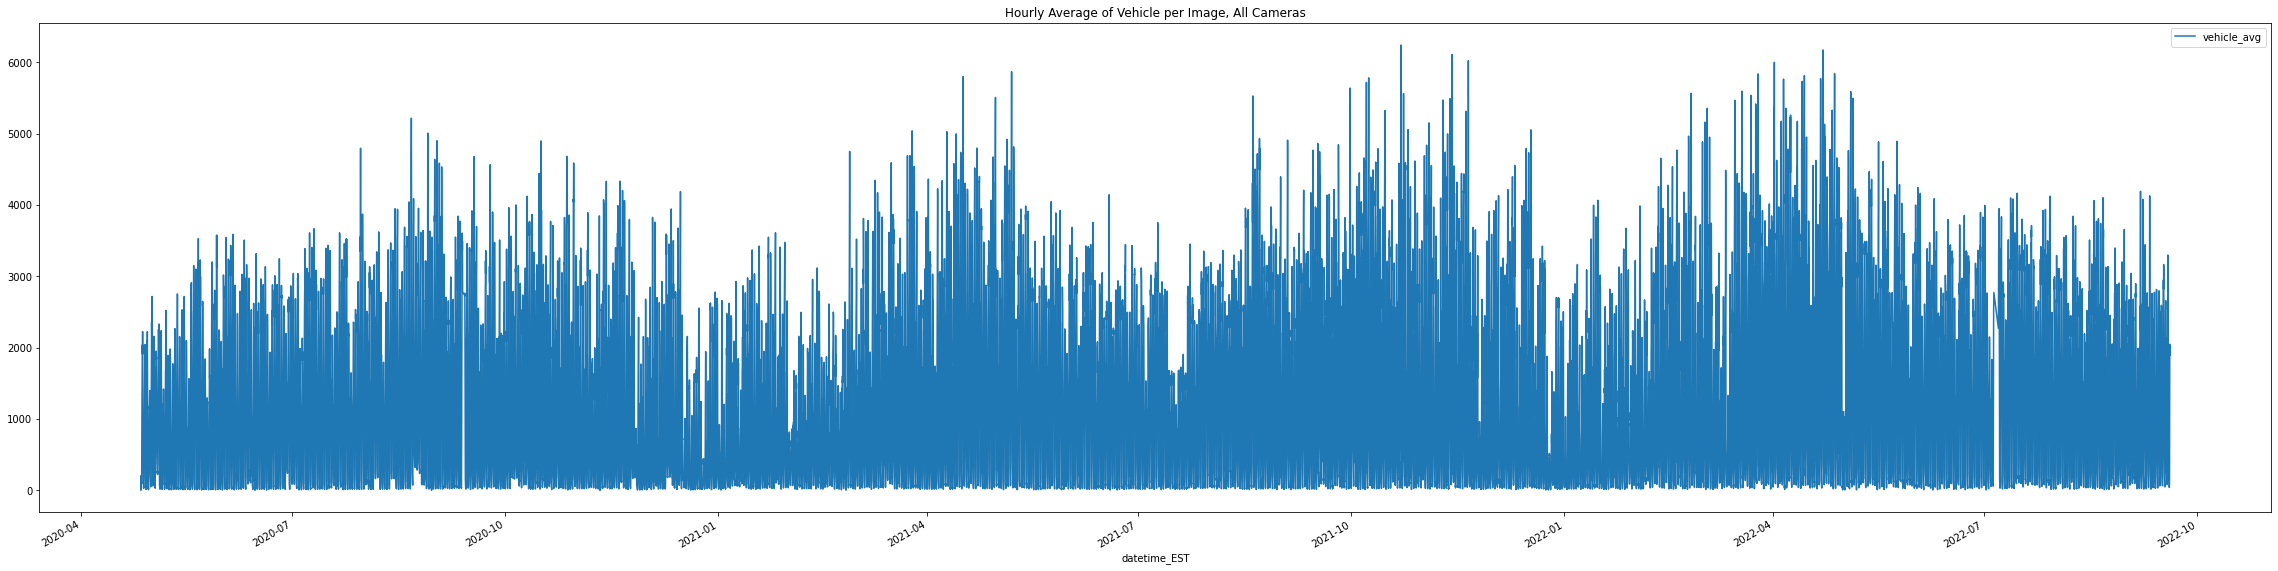

In [28]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicle per Image, All Cameras")

In [29]:
df_sampledh

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0     2020-04-26 20:00:00            144        960   198.000000  20   6
1     2020-04-26 21:00:00              0         68     0.000000  21   6
2     2020-04-26 22:00:00             11        516    28.139535  22   6
3     2020-04-26 23:00:00             38        794    63.173804  23   6
4     2020-04-27 00:00:00             77        796   127.688442   0   0
...                   ...            ...        ...          ...  ..  ..
20942 2022-09-19 05:00:00            117       1818    84.950495   5   0
20943 2022-09-19 06:00:00            807       1781   598.113419   6   0
20944 2022-09-19 07:00:00           2483       1757  1865.429710   7   0
20945 2022-09-19 08:00:00           2700       1743  2044.750430   8   0
20946 2022-09-19 09:00:00           2017       1407  1892.281450   9   0

[20947 rows x 6 columns]

In [47]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-04-26 00:00:00') & (df_sampledh['datetime_EST'] < '2022-09-19 00:00:00')]

In [48]:
sds

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0     2020-04-26 20:00:00            144        960   198.000000  20   6
1     2020-04-26 21:00:00              0         68     0.000000  21   6
2     2020-04-26 22:00:00             11        516    28.139535  22   6
3     2020-04-26 23:00:00             38        794    63.173804  23   6
4     2020-04-27 00:00:00             77        796   127.688442   0   0
...                   ...            ...        ...          ...  ..  ..
20932 2022-09-18 19:00:00           2325       1774  1729.988726  19   6
20933 2022-09-18 20:00:00            661       1786   488.533035  20   6
20934 2022-09-18 21:00:00            482       1773   358.849408  21   6
20935 2022-09-18 22:00:00            329       1802   240.998890  22   6
20936 2022-09-18 23:00:00            278       1762   208.263337  23   6

[20937 rows x 6 columns]

In [49]:
sds.nunique()

datetime_EST     20937
vehicle_count     4961
image_sum         1238
vehicle_avg      20462
ti                  24
dy                   7
dtype: int64

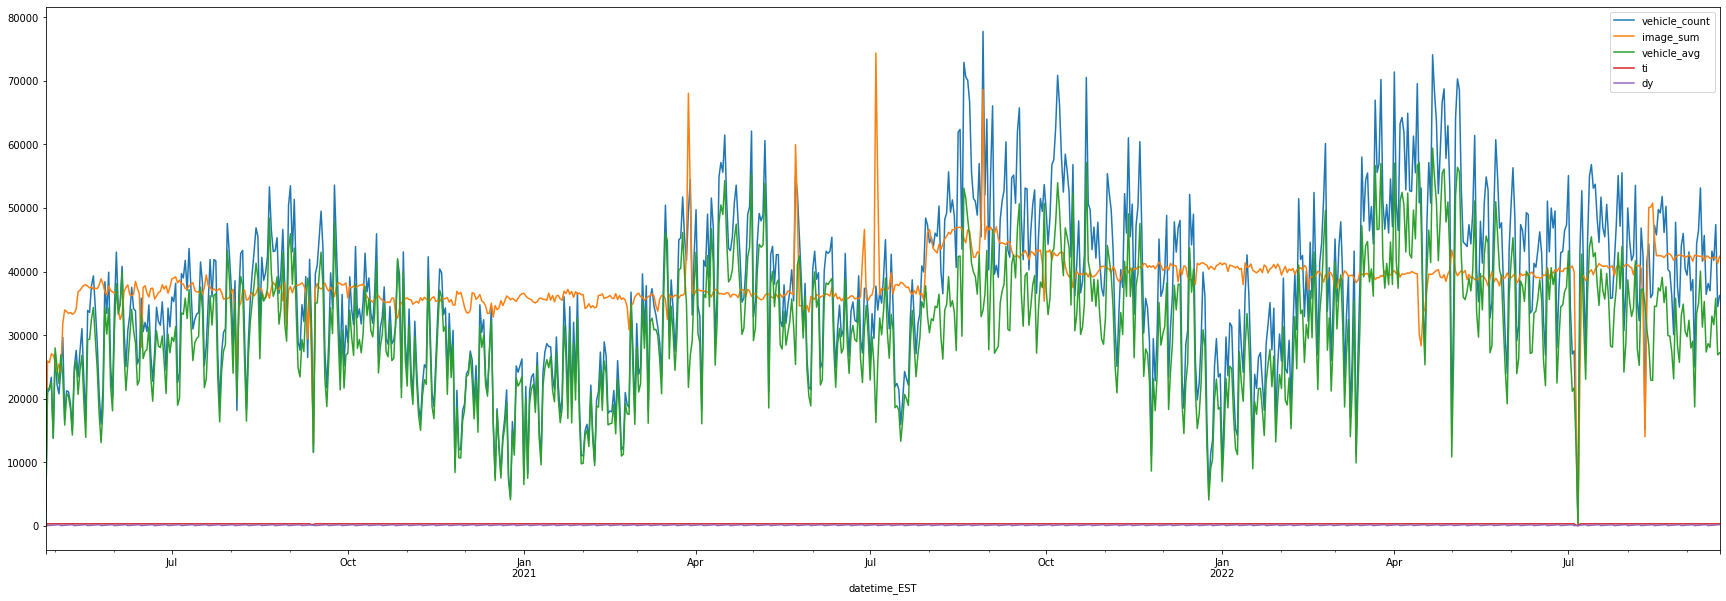

In [50]:
ddcdf = sds.groupby([pd.Grouper(key='datetime_EST',freq='D')]).sum().plot(figsize=(30,10))

In [51]:
ddcdf = sds.groupby([pd.Grouper(key='datetime_EST',freq='D')]).sum()

In [52]:
ddcdf

vehicle_count  image_sum   vehicle_avg   ti   dy
datetime_EST                                                  
2020-04-26              193       2338    289.313338   86   24
2020-04-27            20972      25921  21426.515528  276    0
2020-04-28            21403      25647  21684.807069  276   24
2020-04-29            23344      27016  22479.335516  276   48
2020-04-30            13765      26869  13785.600425  276   72
...                     ...        ...           ...  ...  ...
2022-09-14            43220      42068  32972.116009  276   48
2022-09-15            41742      42218  31633.675382  276   72
2022-09-16            47387      42261  35784.687135  276   96
2022-09-17            34462      41289  26879.833866  276  120
2022-09-18            36205      42402  27188.162835  276  144

[876 rows x 5 columns]

In [53]:
ddcdf

vehicle_count  image_sum   vehicle_avg   ti   dy
datetime_EST                                                  
2020-04-26              193       2338    289.313338   86   24
2020-04-27            20972      25921  21426.515528  276    0
2020-04-28            21403      25647  21684.807069  276   24
2020-04-29            23344      27016  22479.335516  276   48
2020-04-30            13765      26869  13785.600425  276   72
...                     ...        ...           ...  ...  ...
2022-09-14            43220      42068  32972.116009  276   48
2022-09-15            41742      42218  31633.675382  276   72
2022-09-16            47387      42261  35784.687135  276   96
2022-09-17            34462      41289  26879.833866  276  120
2022-09-18            36205      42402  27188.162835  276  144

[876 rows x 5 columns]

In [54]:
ddcdf = sds.groupby([pd.Grouper(key='datetime_EST',freq='D')]).sum()

In [55]:
ddcdf.to_csv("daily_vehicles.csv")#,index=False)

In [56]:
ddcdf['moving_avg'] = ddcdf['vehicle_avg'].rolling(window=7,center=True).mean() 

In [57]:
sdcdf = ddcdf[['vehicle_avg','moving_avg']]

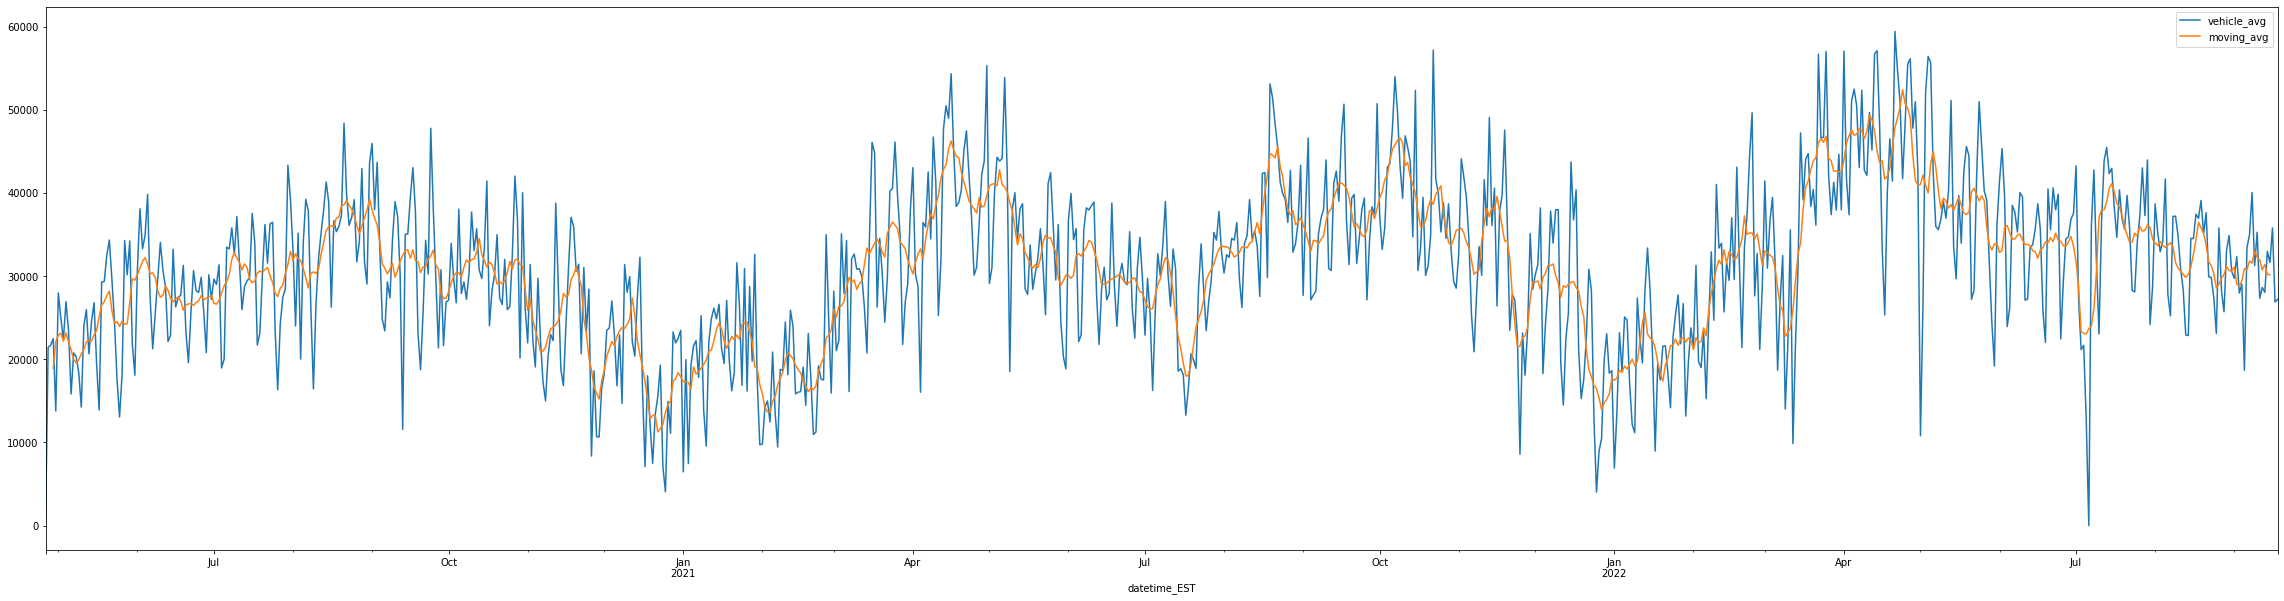

In [58]:
sdcdf.plot(figsize=(40,10))

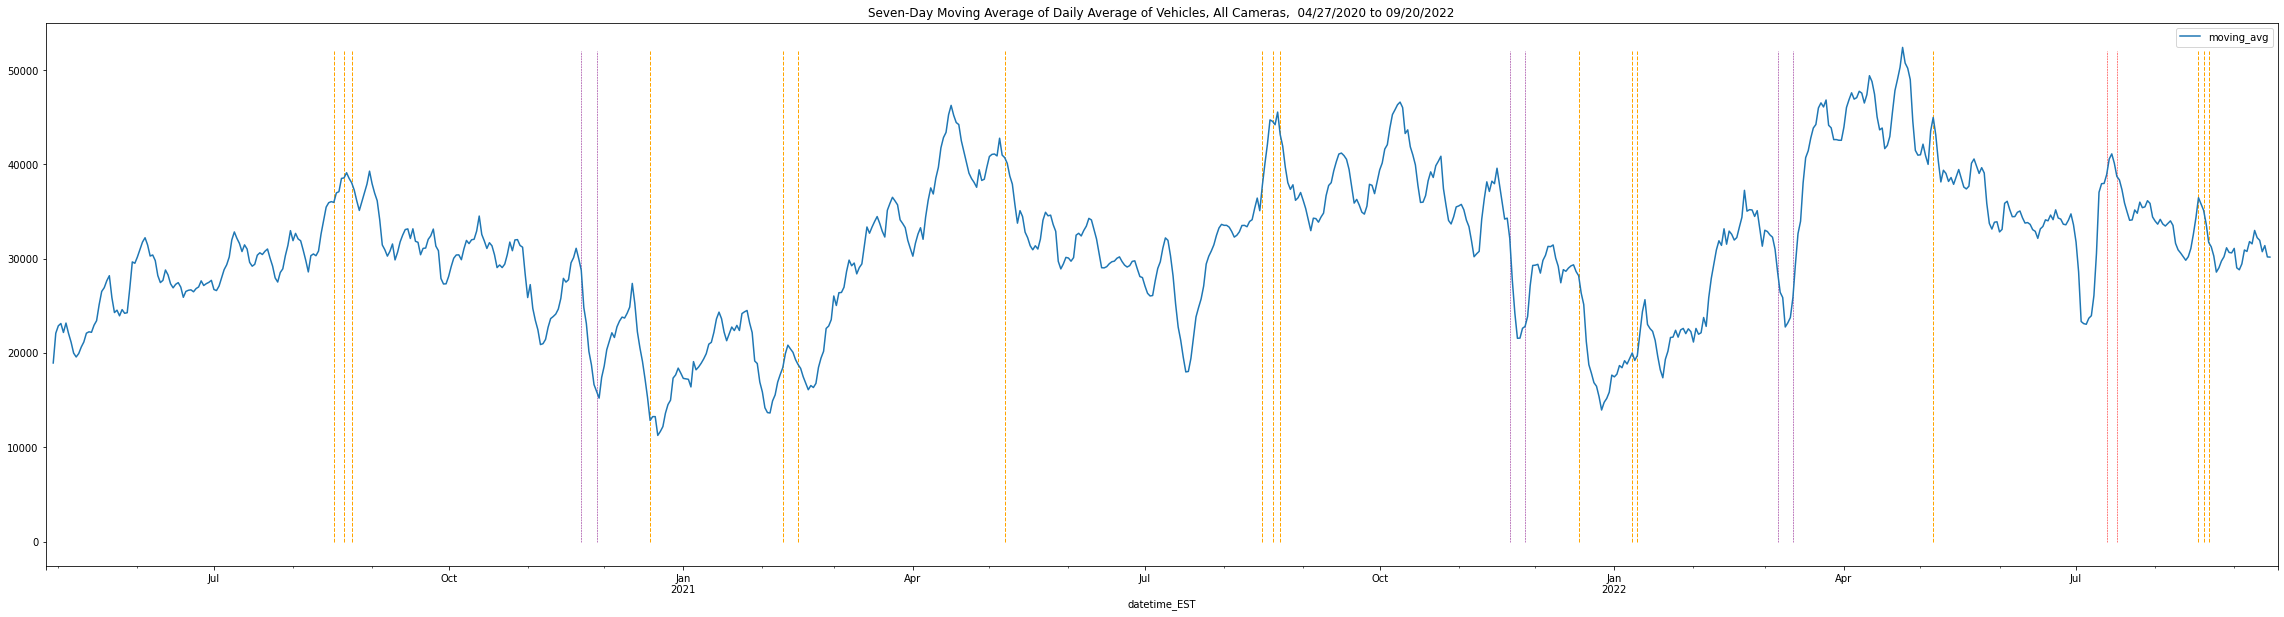

In [59]:
ax = sdcdf.plot( y='moving_avg', kind = 'line',figsize=(40,10),title="Seven-Day Moving Average of Daily Average of Vehicles, All Cameras,  04/27/2020 to 09/20/2022")
y_min = 0
y_max = 52000

plt.vlines(x=['2020-11-22 00:00:00','2020-11-28 00:00:00' ,'2021-11-21 00:00:00','2021-11-27 00:00:00'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2020-08-17 00:00:00','2020-08-21 00:00:00','2020-08-24 00:00:00','2021-02-09 00:00:00','2021-02-15 00:00:00','2021-05-07 00:00:00','2022-01-10 00:00:00','2022-01-08 00:00:00','2022-05-06 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

plt.vlines(x=['2022-07-13 00:00:00','2022-07-17 00:00:00'], ymin=y_min, ymax=y_max, colors='red', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2022-03-06 00:00:00','2022-03-12 00:00:00'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2020-12-19 00:00:00','2021-12-18 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')
plt.vlines(x=['2021-08-16 00:00:00','2021-08-20 00:00:00','2021-08-23 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')
plt.vlines(x=['2022-08-18 00:00:00','2022-08-20 00:00:00','2022-08-22 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

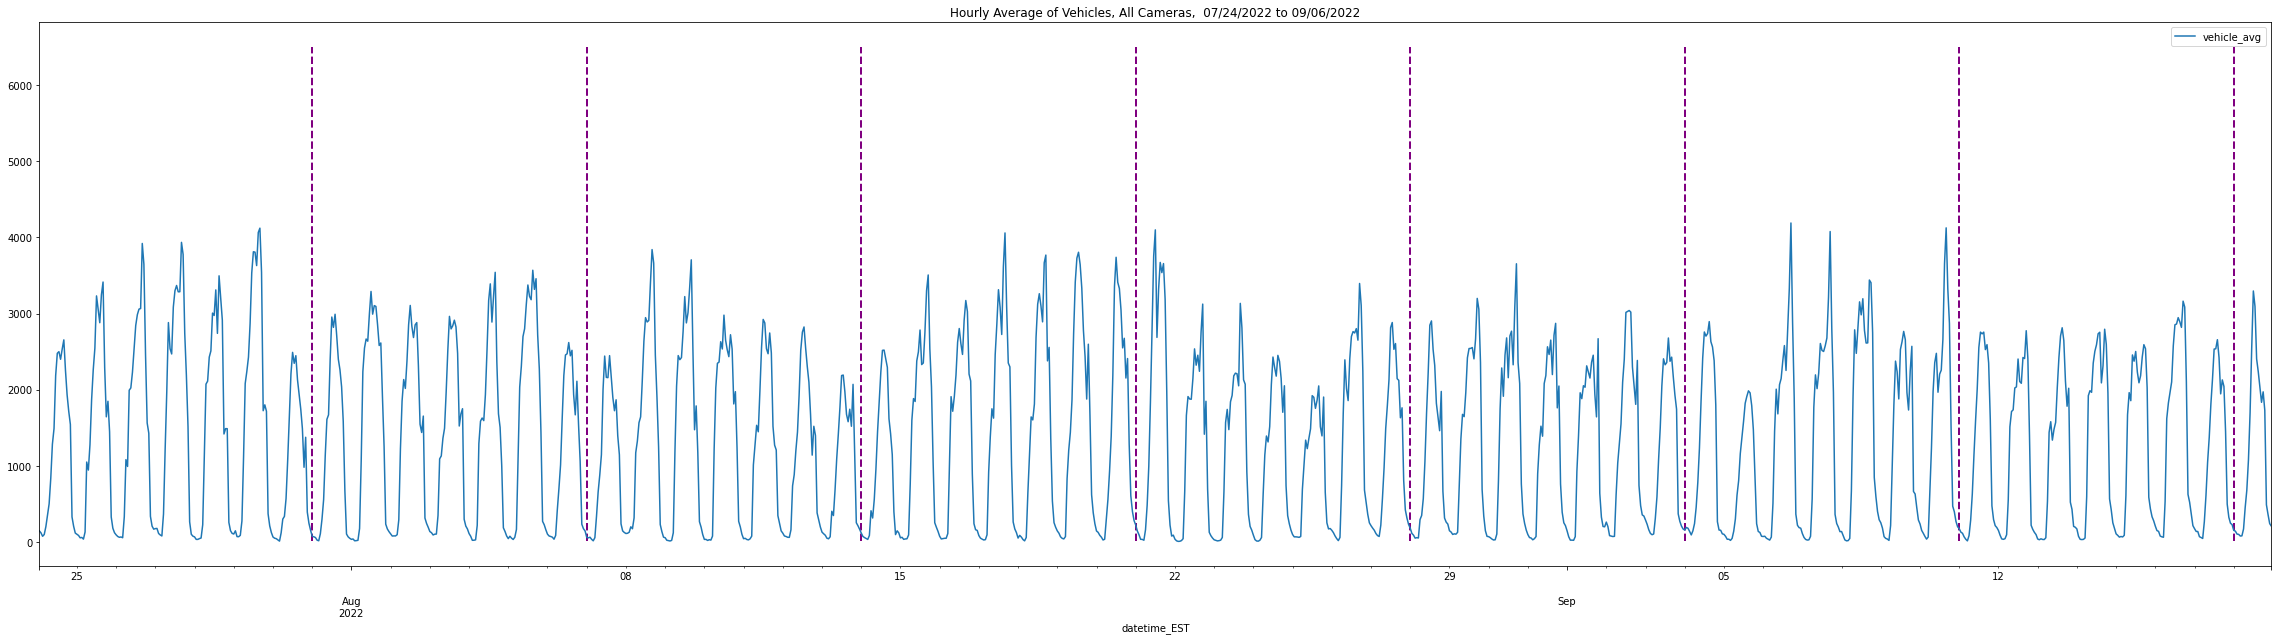

In [62]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2022-07-24 00:00:00') & (df_sampledh['datetime_EST'] < '2022-09-19 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  07/24/2022 to 09/06/2022")
y_min = sds.vehicle_count.min()
y_max = 6500

plt.vlines(x=['2022-07-24','2022-07-31','2022-08-07','2022-08-14','2022-08-21','2022-08-28','2022-09-04','2022-09-11','2022-09-18'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')


In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))